<a href="https://colab.research.google.com/github/Kevinlo937/cord-cutting-predicated/blob/main/topMSO_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports:
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
# ** Read in the csv file ** :
df = pd.read_csv('/content/ds_numService.csv', sep='^')

In [ ]:
df.head()

,客編,相關編號,30天內,60天內,90天內,90天以上,平均等待天數,繳別,使用狀態_數值,產品名稱_數值
0,679626,753689,1,0,0,1,0.0,1,0,0
1,679655,753721,2,0,0,0,0.5,1,0,1
2,679698,753768,1,0,0,3,0.5,1,0,1
3,679710,753780,1,0,0,1,1.5,12,0,0
4,679729,753799,1,0,0,0,0.0,12,0,1


In [ ]:
df.drop(['相關編號','產品名稱_數值'], axis=1, inplace=True)

In [ ]:
df_w_no = df.copy()
# df.drop(['客編','相關編號' ], axis=1, inplace=True)

In [ ]:
df.head()

,客編,30天內,60天內,90天內,90天以上,平均等待天數,繳別,使用狀態_數值
0,679626,1,0,0,1,0.0,1,0
1,679655,2,0,0,0,0.5,1,0
2,679698,1,0,0,3,0.5,1,0
3,679710,1,0,0,1,1.5,12,0
4,679729,1,0,0,0,0.0,12,0


In [ ]:
df_w_no.head()

,客編,30天內,60天內,90天內,90天以上,平均等待天數,繳別,使用狀態_數值
0,679626,1,0,0,1,0.0,1,0
1,679655,2,0,0,0,0.5,1,0
2,679698,1,0,0,3,0.5,1,0
3,679710,1,0,0,1,1.5,12,0
4,679729,1,0,0,0,0.0,12,0


In [ ]:
# Feature variables (特徵變數):
X = df.drop('使用狀態_數值', axis=1)

# Target variable (目標變數):
y = df['使用狀態_數值']

In [ ]:
# Split the data into a training set and a testing set
from sklearn.model_selection import train_test_split

# 建立 training & testing sets：
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

X_train.drop(['客編' ], axis=1, inplace=True)
customer_ids = X_test[['客編']] # Extract both columns
X_test.drop(['客編' ], axis=1, inplace=True)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_test.head()

,30天內,60天內,90天內,90天以上,平均等待天數,繳別
37146,1,0,0,1,0.5,1
45501,1,0,0,0,1.0,1
34276,1,0,0,0,1.0,6
34496,1,0,0,0,1.0,6
24544,1,2,0,2,0.8,6


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# p: 1→曼哈頓距離 / 2→歐基里德距離 / 其他: 明氏距離
clf = KNeighborsClassifier(n_neighbors=3, p=2,weights='distance')

# 訓練模型
clf.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3, weights='distance')

import joblib

# Load the model from the file
loaded_model = joblib.load('knn_model.pkl')

# Make predictions on new data
new_predictions = loaded_model.predict(new_X_test)

In [ ]:
import joblib

# Save the model to a file
joblib.dump(clf, 'knn_model.pkl')

['knn_model.pkl']

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test.head()

,30天內,60天內,90天內,90天以上,平均等待天數,繳別
37146,1,0,0,1,0.5,1
45501,1,0,0,0,1.0,1
34276,1,0,0,0,1.0,6
34496,1,0,0,0,1.0,6
24544,1,2,0,2,0.8,6


In [ ]:
y_test.head()

,使用狀態_數值
37146,0
45501,0
34276,0
34496,0
24544,1


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     12631
           1       0.13      0.03      0.04      1733

    accuracy                           0.86     14364
   macro avg       0.50      0.50      0.48     14364
weighted avg       0.79      0.86      0.82     14364



In [ ]:
# Create a DataFrame
results_df = pd.DataFrame({'客編': customer_ids['客編'],
                           'Prediction': predictions})

In [ ]:
results_df.head()

,客編,Prediction
37146,1171220,0
45501,1235596,0
34276,1160733,0
34496,1006514,0
24544,1118867,1


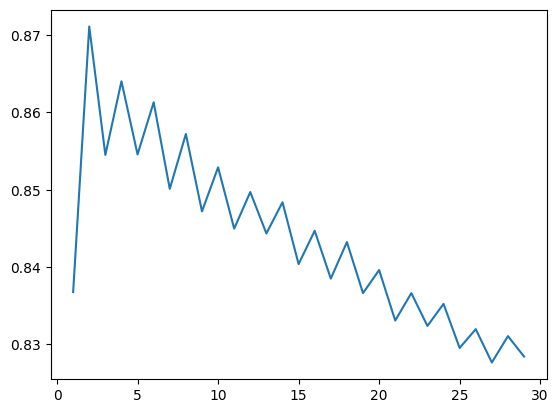

In [ ]:
# Find the Best k
import matplotlib.pyplot as plt

accuracy = []
for k in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_resampled, y_train_resampled)
  y_pred = knn.predict(X_test)
  accuracy.append(metrics.accuracy_score(y_test, y_pred))
k_range = range(1,30)
plt.plot(k_range, accuracy)
plt.show()

In [ ]:
X_test = pd.read_csv('/content/ds_test_大屯2025Q1.csv', sep='^')

In [ ]:
X_test.head()

,客編,30天內,60天內,90天內,90天以上,平均等待天數,繳別
0,1167310,1,0,0,0,0.0,1.0
1,97476,1,0,0,0,8.0,12.0
2,901684,1,0,0,0,9.0,12.0
3,1009664,1,0,0,0,0.0,NaN
4,1170176,1,0,0,0,0.0,1.0


In [ ]:
X_test.dropna(inplace=True)
customer_ids = X_test[['客編']] # Extract both columns
X_test.drop(['客編' ], axis=1, inplace=True)
predictions = clf.predict(X_test)

In [ ]:
# Create a DataFrame
results_df = pd.DataFrame({'客編': customer_ids['客編'],
                           'Prediction': predictions})

In [ ]:
results_df.Prediction.value_counts()

,count
Prediction,
0,1073
1,18


樣本加上客戶編號之後，顯著的降低 accuracy

In [ ]:
# Feature variables (特徵變數):
X = df_w_no.drop('使用狀態_數值', axis=1)

# Target variable (目標變數):
y = df_w_no['使用狀態_數值']

# Split the data into a training set and a testing set
from sklearn.model_selection import train_test_split

# 建立 training & testing sets：
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

from sklearn.neighbors import KNeighborsClassifier

# p: 1→曼哈頓距離 / 2→歐基里德距離 / 其他: 明氏距離
clf = KNeighborsClassifier(n_neighbors=3, p=2,weights='distance')

# 訓練模型
clf.fit(X_train_resampled, y_train_resampled)

predictions = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77     12631
           1       0.14      0.37      0.20      1733

    accuracy                           0.64     14364
   macro avg       0.51      0.53      0.49     14364
weighted avg       0.80      0.64      0.70     14364

